In [139]:
# imports
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
from tqdm.notebook import tqdm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, scale
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.ndimage import gaussian_filter1d
import numpy as np
import scipy
from math import exp

In [2]:
# import configurations
InteractiveShell.ast_node_interactivity = "all"
tqdm.pandas()

In [120]:
# read files
df_sentiment = pd.read_pickle("../data/cleaned/tweets_verified_sentiment_2020-2021.pkl")
df_tweet = pd.read_pickle("../data/cleaned/tweets_verified_2020-2021_cleaned.pkl")
df_bitcoin = pd.read_csv("../data/raw/bitcoin_value_2020-2021.csv", parse_dates=["datetime"])

df_bitcoin['diff'] = df_bitcoin['close_bitcoin'].diff()

,sum_metrics,id
0,0,28660
1,1,26524
2,2,20857
3,3,15447
4,4,12001
...,...,...
7429,322701,1
7430,384178,1
7431,688122,1
7432,1010436,1


<BarContainer object of 7434 artists>

(0.0, 100.0)

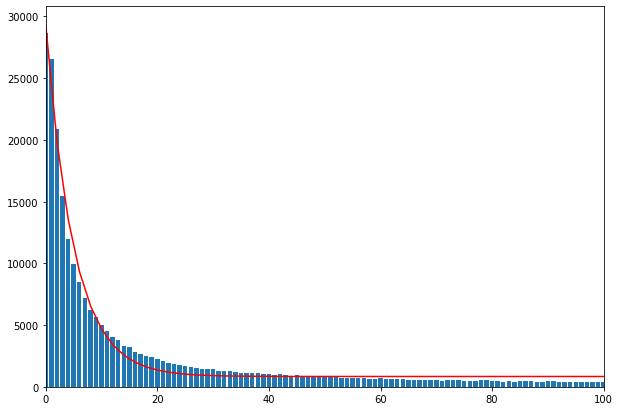

In [148]:
df_tweet_sentiment = pd.merge(df_tweet, df_sentiment, on='id')

df_tweet_sentiment['sum_metrics'] = df_tweet_sentiment['replies_count'] + \
                                    df_tweet_sentiment['retweets_count'] + \
                                    df_tweet_sentiment['likes_count']

df_freq = df_tweet_sentiment.groupby('sum_metrics').agg({'id':'count'}).reset_index()
df_freq
fig, ax = plt.subplots(figsize=(10, 7))

ax.bar(df_freq['sum_metrics'], df_freq['id'])
# ax.legend()
ax.plot(x, y, 'r')

ax.set_xlim(0, 100)

plt.show()

In [147]:
df_freq
np_metrics = df_freq['sum_metrics'].to_numpy()
np_tweets = df_freq['id'].to_numpy()

def func(x, a, b, c):
    return a * np.exp(-b * x) + c

const = scipy.optimize.curve_fit(func,  np_metrics[0:100],  np_tweets[0:100])[0]
const
x = np.linspace(0,200,100)
y = const[0] * np.exp(- const[1] * x) + const[2]

y

,sum_metrics,id
0,0,28660
1,1,26524
2,2,20857
3,3,15447
4,4,12001
...,...,...
7429,322701,1
7430,384178,1
7431,688122,1
7432,1010436,1


/var/folders/2z/kxs88bl94b9cv_s7wzw69_mh0000gn/T/ipykernel_51297/1728007161.py:6: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x) + c
/var/folders/2z/kxs88bl94b9cv_s7wzw69_mh0000gn/T/ipykernel_51297/1728007161.py:6: RuntimeWarning: overflow encountered in multiply
  return a * np.exp(-b * x) + c


array([2.85176379e+04, 2.00038886e-01, 8.35636405e+02])

array([29353.27427933, 19873.00483863, 13544.31159312,  9319.49937167,
        6499.16385942,  4616.40742321,  3359.54568364,  2520.50915082,
        1960.3979777 ,  1586.48752924,  1336.87811208,  1170.24767586,
        1059.01107834,   984.75345225,   935.1816822 ,   902.08931829,
         879.99802424,   865.2506561 ,   855.40583369,   848.83377774,
         844.44650517,   841.51771687,   839.56256117,   838.25736824,
         837.38606752,   836.80441791,   836.41612916,   836.15692129,
         835.98388327,   835.8683692 ,   835.79125608,   835.73977808,
         835.70541319,   835.6824724 ,   835.66715794,   835.65693455,
         835.65010977,   835.64555379,   835.64251238,   835.64048204,
         835.63912666,   835.63822185,   835.63761783,   835.63721461,
         835.63694544,   835.63676575,   835.63664579,   835.63656571,
         835.63651225,   835.63647657,   835.63645275,   835.63643684,
         835.63642623,   835.63641914,   835.63641441,   835.63641125,
      

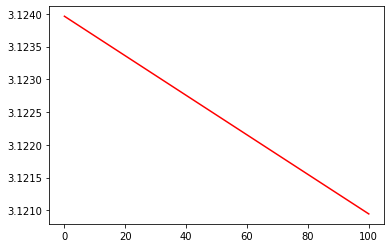

In [114]:


plt.plot(x,y, 'r')


plt.show()

In [6]:
df_tweet_sentiment = pd.merge(df_tweet, df_sentiment, on='id')

df_by_date = df_tweet_sentiment.groupby(df_tweet_sentiment['created_at'].dt.date).agg({
    'id':'count',
    'replies_count':'mean',
    'retweets_count':'mean',
    'likes_count':'mean',
    'sentiment': 'mean',
}).reset_index()

df_by_date = df_by_date.astype({'created_at':'datetime64[ns]'})

df_by_date.head()

SpecificationError: nested renamer is not supported

In [5]:
df = pd.merge(
    df_by_date, 
    df_bitcoin[['datetime', 'diff']], 
    left_on='created_at', 
    right_on='datetime'
).dropna()

df.head()

,created_at,id,replies_count,retweets_count,likes_count,sentiment,datetime,diff
1,2020-01-02,134,5.582090,21.186567,58.358209,0.132057,2020-01-02,379.25
2,2020-01-03,148,11.371622,21.229730,74.831081,0.168709,2020-01-03,9.15
3,2020-01-04,86,8.662791,15.883721,106.453488,0.119292,2020-01-04,4.64
4,2020-01-05,110,30.236364,22.663636,91.163636,0.080199,2020-01-05,399.25
5,2020-01-06,132,29.651515,29.530303,59.969697,0.048574,2020-01-06,387.28
